In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

# 변경하고자 하는 새로운 디렉토리 경로
new_directory = '/content/drive/MyDrive'

# 디렉토리 위치 변경
os.chdir(new_directory)

# 변경된 디렉토리 경로 출력
print("Current directory:", os.getcwd())


Current directory: /content/drive/MyDrive


# 선형 회귀

평군 제곱 오차(Mean Squared Error : MSE)
- 예측치와 데이터의 오차를 나타내는 지표
- 손실함수가 최소값이 되는 W와 b를 찾아야함

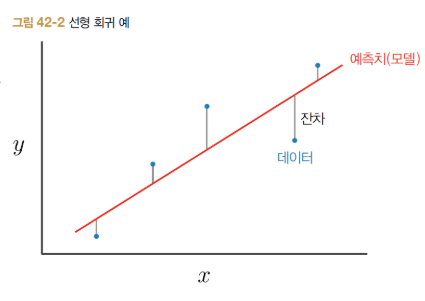

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from dezero import Variable
import dezero.functions as F

In [18]:
np.random.seed(0)
x = np.random.rand(100, 1)
y = 5 + 2 * x + np.random.rand(100, 1)
x, y = Variable(x), Variable(y)

W = Variable(np.zeros((1,1)))
b = Variable(np.zeros(1))

In [19]:
def predict(x):
  y = F.matmul(x,W) + b
  return y

def mean_squared_error(x0, x1):
  diff = x0 - x1
  return F.sum(diff **2) / len(diff)

lr = 0.1
iters = 100
for i in range(iters):
  y_pred = predict(x)
  loss = mean_squared_error(y, y_pred)

  W.cleargrad()
  b.cleargrad()
  loss.backward()

  W.data -= lr * W.grad.data
  b.data -= lr * b.grad.data
  print(W, b, loss)

variable([[0.64433458]]) variable([1.29473389]) variable(42.296340129442335)
variable([[1.12672345]]) variable([2.26959351]) variable(23.97380754378544)
variable([[1.48734571]]) variable([3.00386712]) variable(13.609686745040522)
variable([[1.75641886]]) variable([3.557186]) variable(7.747049961219976)
variable([[1.95666851]]) variable([3.97439789]) variable(4.43057410592155)
variable([[2.10518573]]) variable([4.28923203]) variable(2.554280381353593)
variable([[2.21482401]]) variable([4.52705574]) variable(1.492599869047195)
variable([[2.29524981]]) variable([4.70694745]) variable(0.8916952181756939)
variable([[2.35373273]]) variable([4.84325585]) variable(0.5514270962227455)
variable([[2.39573972]]) variable([4.9467725]) variable(0.3585915308319281)
variable([[2.425382]]) variable([5.02561369]) variable(0.24915731977561134)
variable([[2.44575118]]) variable([5.08588371]) variable(0.1869065876539789)
variable([[2.45917205]]) variable([5.13217364]) variable(0.1513533629631488)
variable(

## 신경망
- 선형데이터는 선형 회귀로 풀 수 있지만 비선형데이터는 선형 회귀로 풀지 못한다.
- 신경망은 비선형데이터도 해결 할 수 있다.

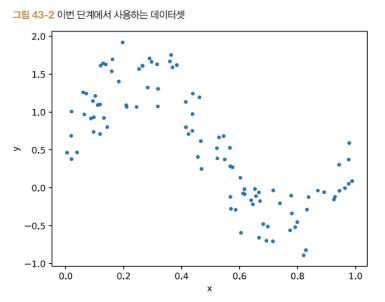

활성화 함수
- 선형 변환은 입력 데이터를 선형으로 변환 해줌
- 신경망은 비선형 데이터를 선형으로 변환 해줌
- ReLU, 시그모이드 함수가 활성화 함수임

<시그모이드 함수>

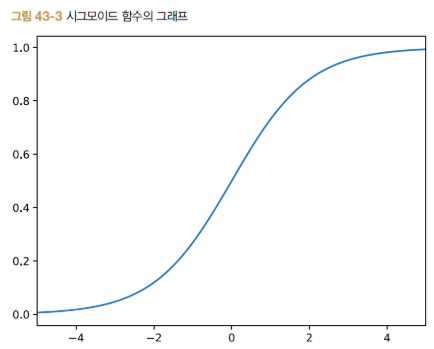

In [20]:
# 시그모이드 함수
def sigmoid_simple(x):
  x = as_variable(x)
  y = 1 / (1 + exp(-x))
  return

# 신경망 추론 코드
# ▪ 연속적으로 변환을 수행하는 일반적인 신경망 형태
# (선형 변환 -> 활성화 함수 -> 선형 변환 -> 활성화 함수 ->….)
# ▪ 선형 변환과 활성화 함수를 순서대로 적용
# ▪ 추론의 정확성을 높이려면 학습이 필요함
# ▪ 신경망 학습에서는 추론을 처리한 후 손실 함수를 추가
# ▪ 손실 함수의 출력을 최소화하는 매개변수를 찾음
# ▪ 선형 변환이나 활성화 함수 등에 의한 변환을 층(Layer)라고 함

# DeZero 의 linear 함수

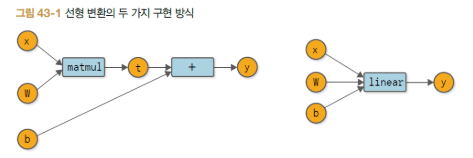

왼쪽의 그림은 t의 메모리 차지, 복잡하다.

오른쪽 그림은 linear을 하나로 합쳐 간단하고 메모리 문제를 해결 한다.
- t값은 순전파 계산이 끝나면 바로 삭제 된다.
- Function 클래스를 상속하여 Linear 클래스를 구현하는 방식

In [21]:
def linear_simple(x, W, b= None):
  t =matmul(x, W)
  if b is None:
    return t

  y =t + b
  t.data = None # t의 데이터 삭제
  return y

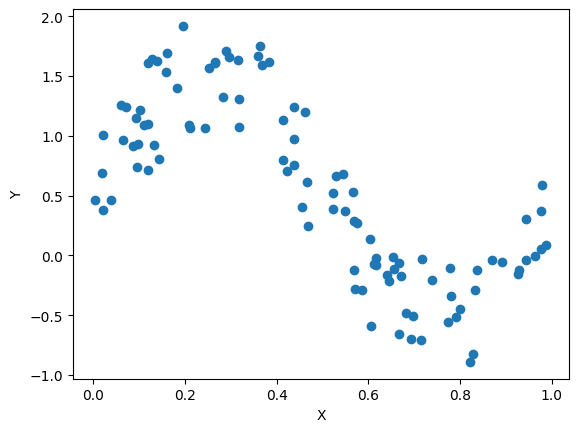

In [29]:
# 비선형 데이터 생성

np.random.seed(0)
x = np.random.rand(100,1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

- 가중치 초기화

In [ ]:
I, H, O = 1, 10, 1
W1 = Variable(0)

(1) 매개변수 초기화
- I는 입력층의 차원 수
- H는 은닉층의 차원 수
- O는 출력층의 차원 수
- 편향은 O 벡터로 초기화

(2) 신경망 추론을 수행

(3) 매개변수 갱신
- 비선형 관계도 제대로 학습
- 더 깊은 신경망도 구현 가능

In [41]:
#(1) 가중치 초기화
I, H, O = 1, 10, 1
W1 = Variable(0.01 * np.random.randn(I, H))
b1 = Variable(np.zeros(H))
W2 = Variable(0.01 * np.random.randn(H, O))
b2 = Variable(np.zeros(O))

#(2) 신경망 추
def predict(x):
  y = F.linear(x, W1, b1)
  y = F.sigmoid(y)
  y = F.linear(y, W2, b2)
  return y


Ir = 0.2
iters = 10000

#(3) 신경망 학습
for i in range(iters):
  y_pred = predict(x)
  loss = F.mean_squared_error(y, y_pred)
  W1.cleargrad()
  b1.cleargrad()
  W2.cleargrad()
  b2.cleargrad()
  loss.backward()

  W1.data -= Ir * W1.grad.data
  b1.data -= Ir * b1.grad.data
  W2.data -= Ir * W2.grad.data
  b2.data -= Ir * b2.grad.data
  if i % 1000 == 0:
    print(loss)

variable(0.8417081868327686)
variable(0.2511796071147112)
variable(0.24728204480466467)
variable(0.23805599420770082)
variable(0.21305566362898407)
variable(0.16852891323264843)
variable(0.09803637709416532)
variable(0.07840726581060176)
variable(0.077374583317902)
variable(0.07712685643419306)


<매개변수를 모아두는 계층>
- DeZero 신경망 프레임워크
- 편의성 면에서 몇 가지 문제가 발생
- 층이 깊어 질수록 매개변수 관리가 힘듦
- 매개변수 관리를 하기에는 너무 복잡함.
- 매개변수 관리를 잘 하기 위해서 Parameter, Layer 사용

## Parameter

층을 실행시키는 코드를 생략할 수 있음
- W1, b1 -> W2, b2 -> W3, b3 .... -> Wn, bn

<parameter 인스턴스와 Variable 인스턴스 구별>
- parameter 인스턴스와 Variable 인스턴스를 조합하여 계산 가능
- isinstance 함수로 구분 가능
- parameter 인스턴스만 담는 구조 만들 수 있음


In [47]:
class Parameter(Variable):
  pass

x = Variable(np.array(1.0))
p = Parameter(np.array(2.0))
y = x / p

isinstance(p,Parameter) # Parameter
isinstance(x,Parameter) # Variable
isinstance(y,Parameter) # Variable

False

## Layer 클래스
- 매개변수를 유지한다는 점이 다름
- 구체적인 변환은 자식 클래스에서 구현

< Layer 클래스 구현>
- _params 라는 인스턴스 변수는 Layer 인스턴스에 속한 매개변수를 보관
- _setattr_메서드는 인스턴스 변수를 설정할 때 호출


In [ ]:
class Layer:
  def __init__(self):
    self.params = set()

  def __setattr__(self, name, value):
    if isinstance(value, Parameter):
      self._params.add(name)
      super().__setattr__(name, value)


In [ ]:
layer = Layer()

layer.p1 = Parameter(np.array(1))
layer.p2 = Parameter(np.array(2))
layer.p3 = Parameter(np.array(3))
layer.p4 = 'test'

print(layer._params)

for name in layer._params:
  print(name, layer.__dict__[name])

▪ Layer 클래스의 4개의 메소드 추가

<call 메서드>
- 입력받은 인수를 건네 forward 메서드 호출
- 출력이 하나뿐이라면 튜플이 아니라
그 출력을 직접 반환
- 입력과 출력 변수를 약한 참조로 유지

<params 메서드>

- Layer 인스턴스에 담겨 있는 Parameter
인스턴스들을 꺼내줌

<cleargrads 메서드>

- 모든 매개변수의 기울기를 재설정함

<yield 반환>

- 처리를 일시 중지하고 값을 반환
- yield 를 사용하면 작업을 재개할 수 있음

<선형 변환을 하는 Linear 클래스 구현>
- Linear 클래스는 Layer 클래스를 상속하여 구현
- 가중치와 편향은 두 parameter 인스턴스 변수의 이름이 self._params에 추가됨
- forward 매서드로 선현 변환을 구현

- init 메서드에서 in_size를 지정하지 않아도 됨
- forward 메서드에서 x의 크기에 맞게 가중치 데이터를 생성

In [55]:
class Layer:
  def __init__(self, out_size, nobias = False, dtype = np.float32, in_size = None):
    super().__init__()
    self.in_size = in_size
    self.out_size = out_size
    self.dtype = dtype

    self.W = Parameter(None, name = 'W')
    if self.in_size is not None:
      self._init_W()

    self.params = set()

  def __setattr__(self, name, value):
    if isinstance(value, Parameter):
      self._params.add(name)
      super().__setattr__(name, value)

  def __call__(self, *inputs):
    outputs = self.forward(*inputs)
    if not isinstance(outputs, tuple):
      outputs = (outputs,)
      self.inputs = [weakerf.ref(x) for x in inputs]
      self.outputs = [weakerf.ref(x) for y in outputs]
      return outputs if len(outputs) > 1 else outputs[0]

  def __init__W(self, xp = np):
    I,O = in_size, out_size
    W_data = np.random.randn(1,0).astype(self.dtype) * np.sqrt(1/1)
    self.W = W_data

  def forward(self, x):
    if self.W.data is None:
      self.in_size = x.shape[1]
      xp = cuda.get_array_module(x)
      self.__init__W(xp)
    y = F.linear(x, self.W, self.b)
    return y


  def params(self):
    for name in self._params:
      yield self._dict_[name]

  def cleargrads(self):
    for param in self.params():
      param.cleargrad()

## Latey 클래스 확장

- 현재 Layer 클래스는 여러 개의 parameter를 가질 수 있음
- Layer 클래스 안에 다른 Layer 가 들어가는 구조
- 바깥 Layer에서 그 안에 존재하는 모든 매개변수를 꺼낼 수 있도록 함

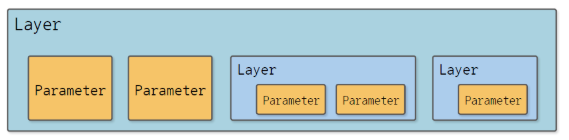

- model = Layer( )에서 인스턴스 생성한 다음 model 인스턴스 변수로 Linear 인스턴스 추가
- model.params( )로 model 내에 존재하는 모든 매개변수에 접근할 수 있음
- model.cleargrads( )는 모든 매개변수의 기울기를 재설정함

In [ ]:
class Layer:
  def __init__(self):
    self.params = set()

  def __setattr__(self, name, value):
    if isinstance(value, Parameter, Layer):
      self._params.add(name)
      super().__setattr__(name, value)


  def params(self):
    for name in self._params:
      obj = self.__dict__[name]

      if isinstance(obj, Layer):
        yield from obj.params()
      else:
        yield obj


< TwoLayerNet >
- Layer 클래스를 상속하여 모델 전체를 하나의 클래스로 정의하는 방법

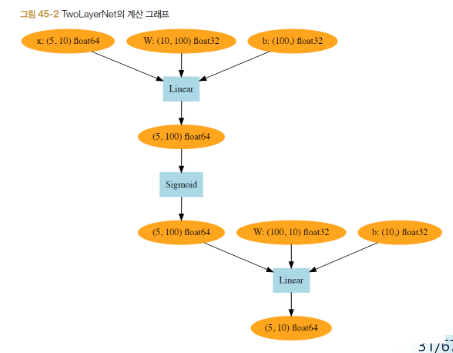

In [57]:
from dezero import Variable, Model

class TwoLayerNet(Model):
  def __init__(self, hidden_size, out_size):
    super().__init__()
    self.I1 = L.Linear(hidden_size)
    self.I2 = L.Linear(out_size)

  def forward(self, x):
    y = F.sigmoid(self, I1(x))
    y = self.I2(y)
    return y

신경망을 전부다 합친것이 MLP